In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1655835943.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of locations
i_data = pd.DataFrame()
len_ = 15

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]

i_data.head(10)

,X,Y
0,13.861748,58.302876
1,-68.498514,-22.333382
2,64.743060,96.807231
3,78.946019,-71.037303
4,-28.997920,28.508731
5,-40.151225,-95.855327
6,-31.035985,5.923103
7,13.760904,-56.483232
8,80.630163,34.584988
9,-39.995324,-35.276180


Text(0.5, 1.0, 'Locations')

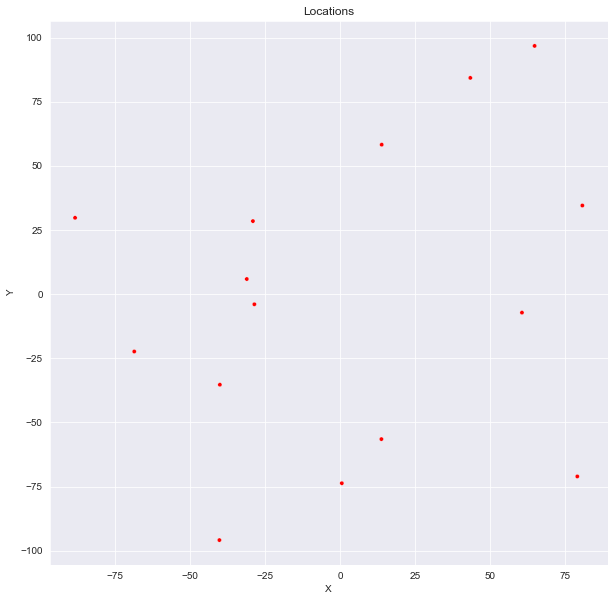

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False, label="Locations")
plt.title('Locations')

In [7]:
# create distance matrix
eucl = lambda x1, y1, x2, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].values
j_loc = i_data[['X', 'Y']].values

dist_ij = np.array([[eucl(i[0],i[1],j[0],j[1]) for j in j_loc] for i in i_loc])
dist_ij

array([[  0.        , 115.26239183,  63.80825355, 144.79241819,  52.19810561, 163.3467258 ,  68.98874572, 114.78615273,  70.85590589, 107.97047759, 132.65130917, 105.95584843,  39.34066896,
         80.40943033,  75.28383323],
       [115.26239183,   0.        , 178.73948295, 155.28027054,  64.38336307,  78.79749467,  46.92408847,  89.06640342, 159.62162496,  31.3041187 ,  86.08601369,  55.72030761, 154.56414247,
        129.92285699,  44.0148404 ],
       [ 63.80825355, 178.73948295,   0.        , 168.44438788, 115.98300038, 219.3665249 , 132.03616958, 161.54611215,  64.21843647, 168.57092466, 182.15918098, 166.96808645,  24.75811243,
        104.06545508, 137.2722456 ],
       [144.79241819, 155.28027054, 168.44438788,   0.        , 146.83768961, 121.65561191, 134.2346653 ,  66.79012048, 105.63571727, 124.20105149,  78.39522379, 195.19208387, 159.40309793,
         66.46446091, 126.70634979],
       [ 52.19810561,  64.38336307, 115.98300038, 146.83768961,   0.        , 124.86318593, 

In [8]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
